In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

from kinematics.inverse_kinematics import NaoInverseKinematics
from interpolation_py2 import interpolate_nd

from pinocchio.utils import *

In [2]:
inverter = NaoInverseKinematics("kinematics/NAOH25V33.urdf")

In [3]:
with open("path.pickle","rb") as f:
    path = pickle.load(f)
with open("time.pickle","rb") as f:
    time = pickle.load(f)


In [4]:
trajectory = interpolate_nd(time, path, d=3)
trajectory_derivative = interpolate_nd(time, path, d=3,deriv=1)

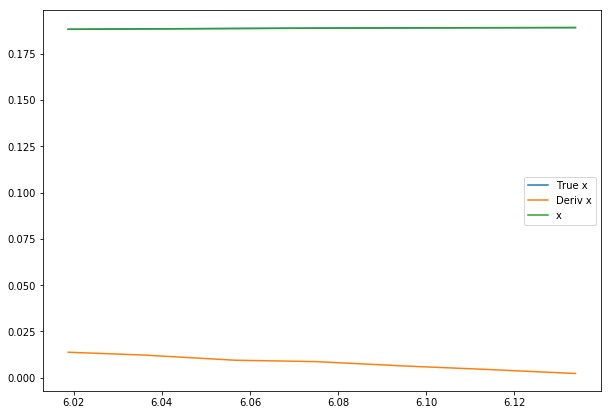

In [5]:
path_interp = np.array([trajectory(t) for t in time])
path_interp_d = np.array([trajectory_derivative(t) for t in time])



plt.figure(figsize=(10,7))
for i,l in enumerate(["x"]):#,"y","z"]):
    plt.plot(time[3:-3],path[3:-3,i],label=("True "+str(l)))
    plt.plot(time[3:-3],path_interp_d[3:-3,i],label=("Deriv "+str(l)))
    plt.plot(time[3:-3],path_interp[3:-3,i],label=l)
plt.legend()
plt.show()

In [6]:
duration = time[-1] - time[0]

In [8]:
configurations = inverter.compute(trajectory, trajectory_derivative, duration,[0,0,0,0,0,0])

In [9]:
import pinocchio as pin
from pinocchio.robot_wrapper import RobotWrapper

In [10]:
model = pin.buildModelFromUrdf("kinematics/NAOH25V33.urdf", pin.JointModelFreeFlyer())

In [10]:
joint_names = ["LShoulderPitch", "LShoulderRoll", "LElbowYaw", "LElbowRoll", "LWristYaw", "LHand"]

In [11]:
dt = 0.01
lam = 100

In [12]:
id_LH = model.getJointId("LHand")

data = model.createData()

In [17]:
[model.getJointId(j) for j in joint_names]

[10, 11, 12, 13, 14, 21]

In [20]:
a = np.array([[1,2],[3,4],[5,6]])
print a
print a.T.reshape((2,3))

[[1 2]
 [3 4]
 [5 6]]
[[1 3 5]
 [2 4 6]]


In [30]:
id = model.getJointId("LHand")
q = zero(model.nq)
model.position(q, 21)

AttributeError: 'Model' object has no attribute 'position'

21